# Loading Packages and Data

In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [398]:
Train = pd.read_csv("Train.csv")
Test = pd.read_csv("Test.csv")

In [399]:
Train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Structure and Content

In [400]:
Train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [401]:
Train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [402]:
Train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [403]:
Train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [404]:
Train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [405]:
Train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

# Exploratory Data Analysis

In [406]:
Train.shape

(8523, 12)

In [407]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [408]:
Train['Item_Fat_Content'] = Train['Item_Fat_Content'].replace(to_replace = 'low fat', value = 'Low Fat')
Train['Item_Fat_Content'] = Train['Item_Fat_Content'].replace(to_replace = 'LF', value = 'Low Fat')
Train['Item_Fat_Content'] = Train['Item_Fat_Content'].replace(to_replace = 'reg', value = 'Regular')
Train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [409]:
Train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [410]:
Train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [411]:
print(Train.duplicated().sum())
Train.drop_duplicates(keep=False,inplace=True)

0


# Remove Outliers

In [412]:
Train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

C:\Users\Midhat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


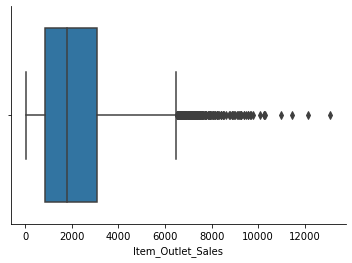

In [413]:
sns.boxplot(Train['Item_Outlet_Sales']) 
sns.despine()

In [414]:
# # features = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']


# Q1 = np.percentile(Train['Item_Outlet_Sales'], 25,interpolation = 'midpoint')
# print("Q1 = ", Q1)
# Q3 = np.percentile(Train['Item_Outlet_Sales'], 75,interpolation = 'midpoint')
# print("Q3 = ", Q3)
# IQR = Q3 - Q1
# print("IQR = ", IQR)
# # Upper bound
# upper = (Q3+(1.5*IQR))
# print('Upper bound = ', upper)
# # Lower bound
# lower = (Q1-(1.5*IQR))
# print('Lower bound = ', lower)

# # sns.boxplot(Train['Item_Outlet_Sales']) 
# # sns.despine()


In [415]:
# for x in ['Item_Outlet_Sales']:
#     q75,q25 = np.percentile(Train.loc[:,x],[75,25])
#     intr_qr = q75-q25
 
#     max = q75+(1.5*intr_qr)
#     min = q25-(1.5*intr_qr)
 
#     Train.loc[Train[x] <= min,x] = np.nan
#     Train.loc[Train[x] >= max,x] = np.nan

In [416]:
# Train['Item_Outlet_Sales'].isnull().sum()
# mean_value = Train['Item_Outlet_Sales'].mean()
# Train['Item_Outlet_Sales'].fillna(value=mean_value, inplace=True)

In [417]:
# for x in ['Item_Outlet_Sales']:
#     Train.loc[Train[x] >= 5000,x] =mean_value

In [418]:
# sns.boxplot(Train['Item_Outlet_Sales']) 
# sns.despine()

In [419]:
# Train['Item_Outlet_Sales'].describe()

# Univariate Analysis

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

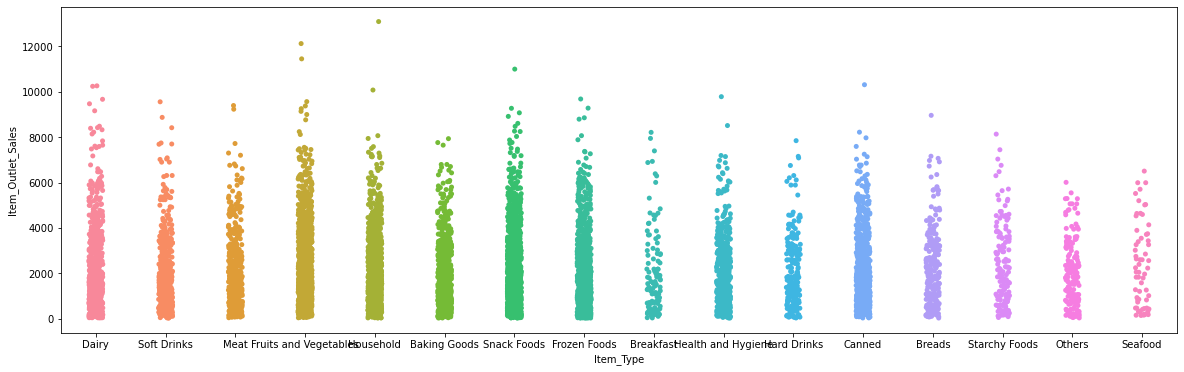

In [420]:
plt.figure(figsize=(20,6))
sns.stripplot(x=Train['Item_Type'], y = Train['Item_Outlet_Sales'])

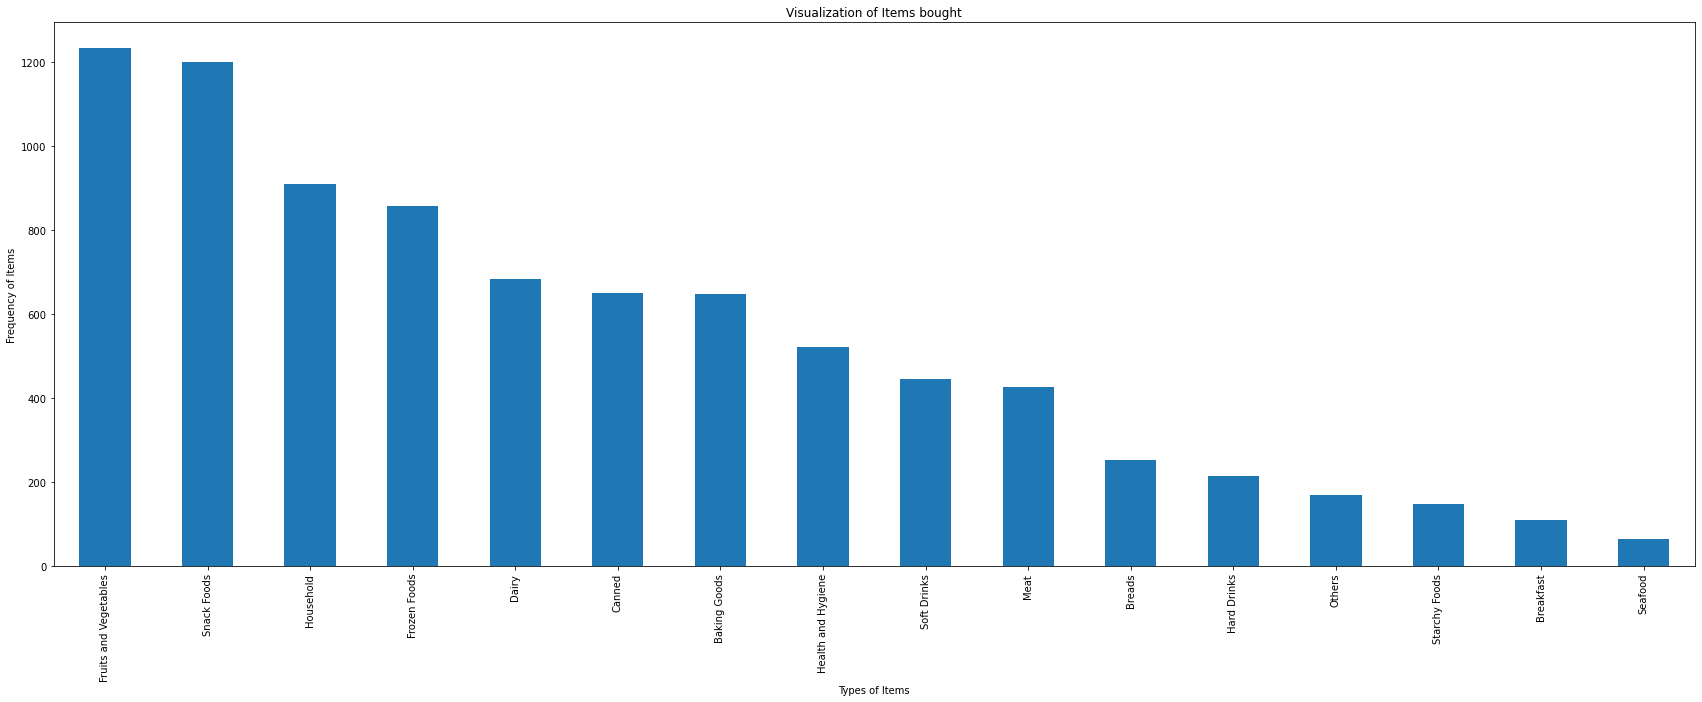

In [421]:
plt.figure(figsize=(100, 10))
plt.subplot(1,3,1)
y = Train['Item_Type'].value_counts().plot(kind = 'bar')
plt.title('Visualization of Items bought')
plt.xlabel('Types of Items')
plt.ylabel('Frequency of Items')
plt.show()

C:\Users\Midhat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

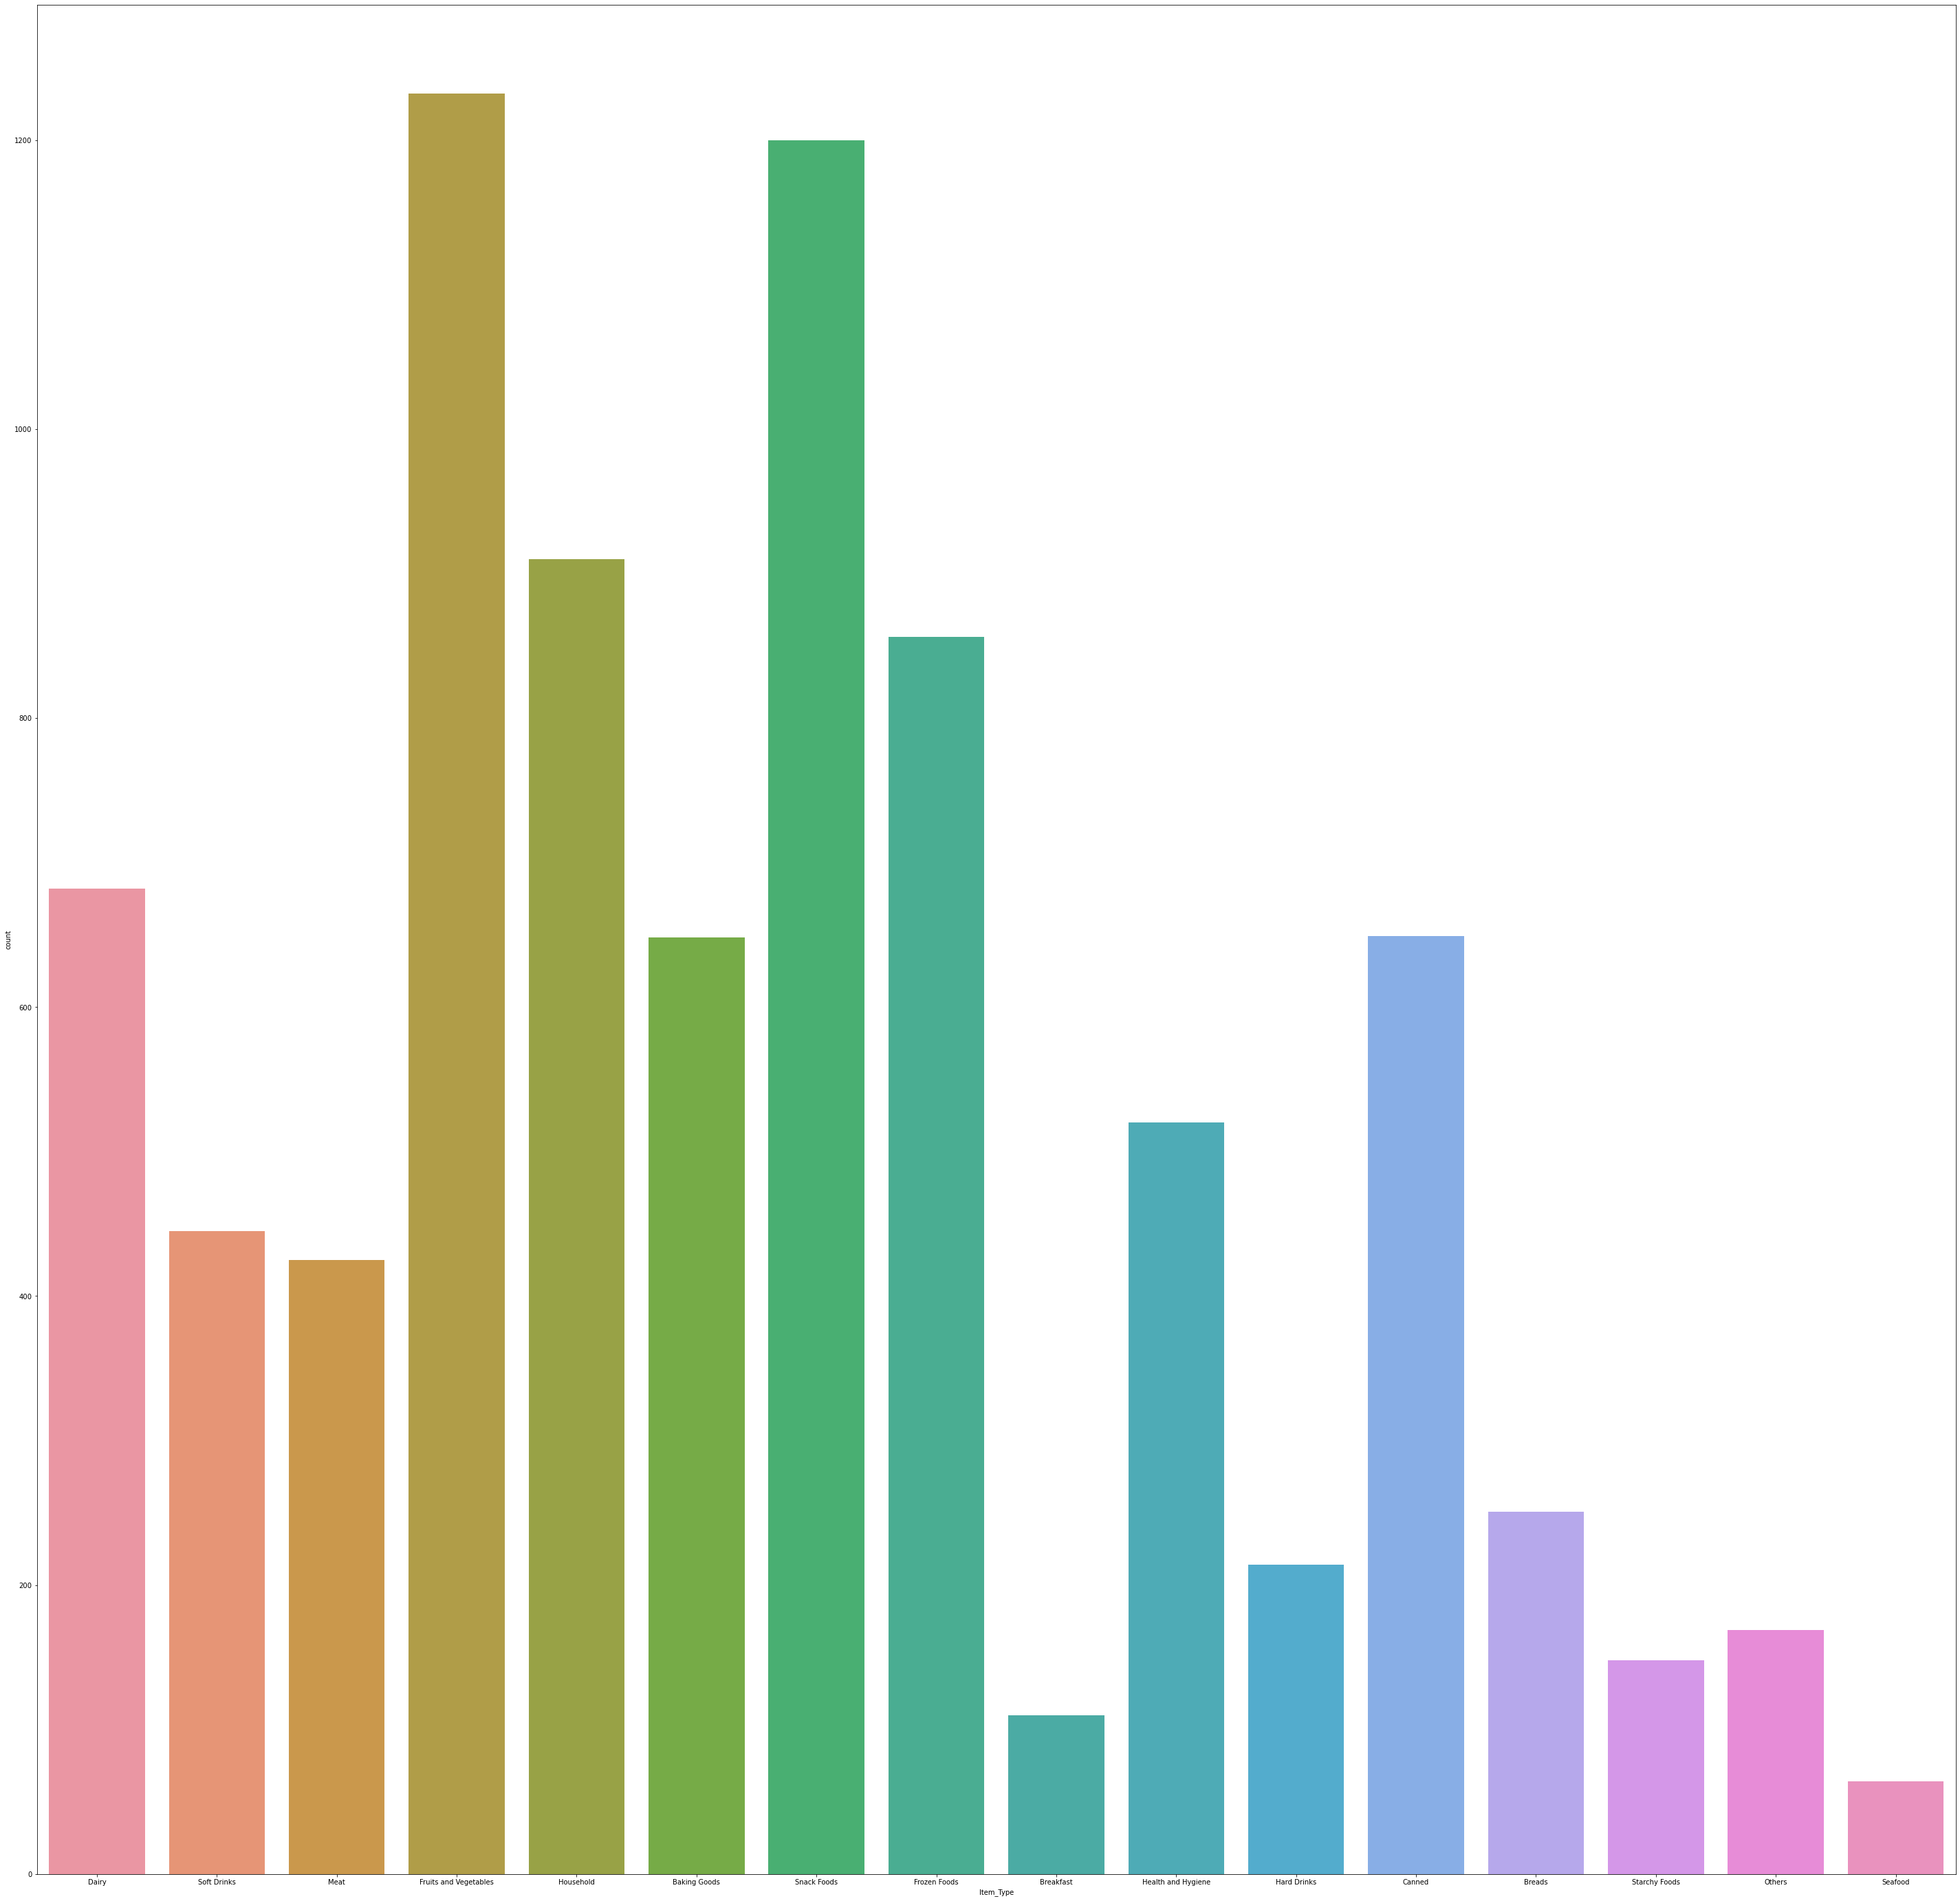

In [422]:
plt.figure(figsize=(50, 50))
sns.countplot(Train['Item_Type'])

C:\Users\Midhat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

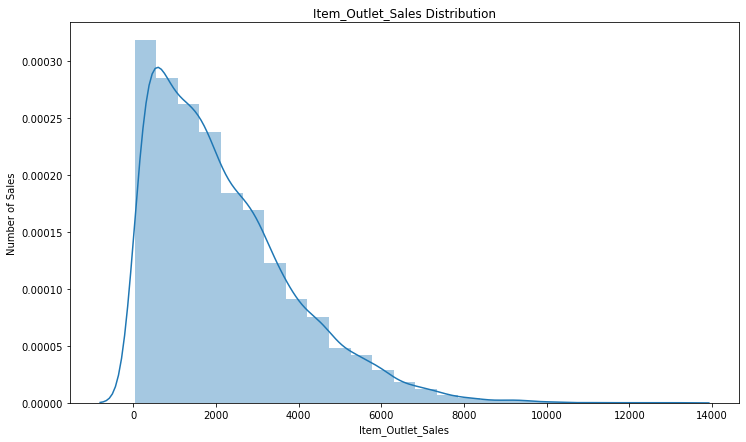

In [423]:
plt.figure(figsize=(12,7))
sns.distplot(Train.Item_Outlet_Sales, bins = 25)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [424]:
print ("Skew is:", Train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % Train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542796
Kurtosis: 1.615877


Rightly Skewed , Normalization Required

C:\Users\Midhat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

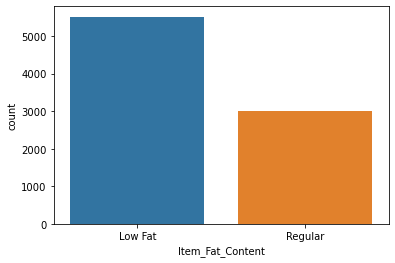

In [425]:
sns.countplot(Train.Item_Fat_Content)

C:\Users\Midhat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

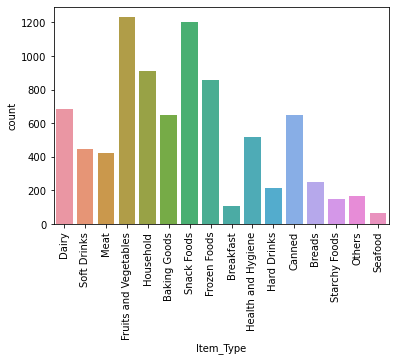

In [426]:
sns.countplot(Train.Item_Type)
plt.xticks(rotation=90)

C:\Users\Midhat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

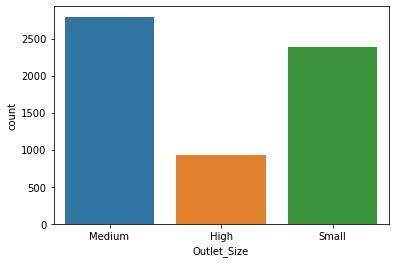

In [427]:
sns.countplot(Train.Outlet_Size)

C:\Users\Midhat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

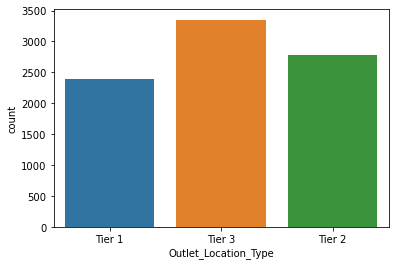

In [428]:
sns.countplot(Train.Outlet_Location_Type)

C:\Users\Midhat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

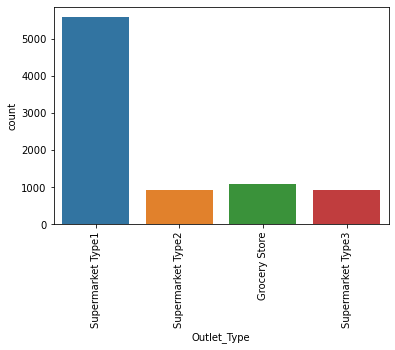

In [429]:
sns.countplot(Train.Outlet_Type)
plt.xticks(rotation=90)

C:\Users\Midhat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

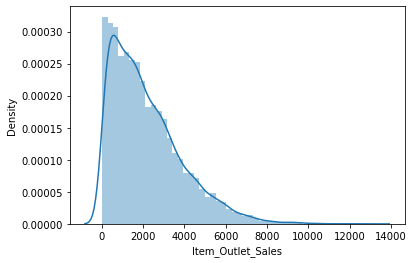

In [430]:
sns.distplot(Train['Item_Outlet_Sales'])

In [431]:
print('Skewness: %f' % Train['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %Train['Item_Outlet_Sales'].kurt())

Skewness: 1.177531
Kurtsis: 1.615877


# Bivariate Analysis

In [432]:
corr = Train.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [433]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

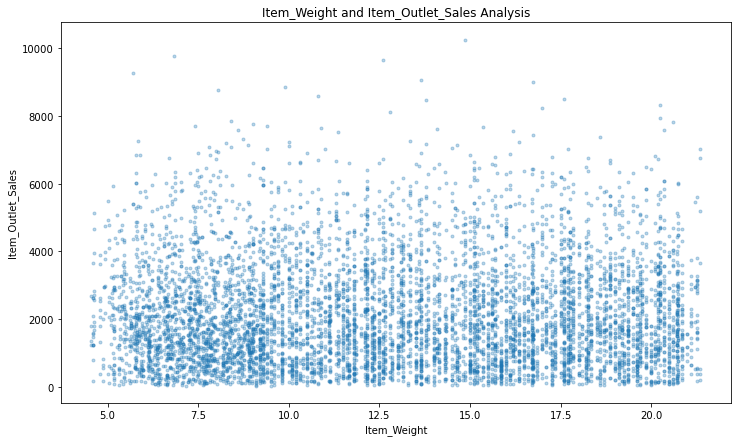

In [434]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(Train.Item_Weight, Train["Item_Outlet_Sales"],'.', alpha = 0.3)

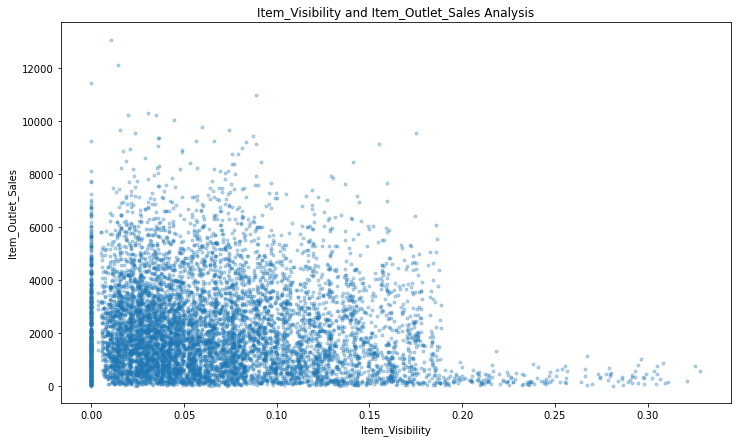

In [435]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(Train.Item_Visibility, Train["Item_Outlet_Sales"],'.', alpha = 0.3)

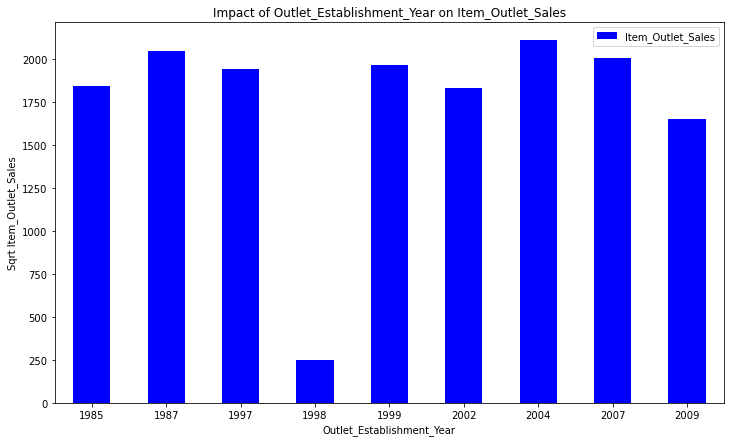

In [436]:
Outlet_Establishment_Year_pivot = Train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

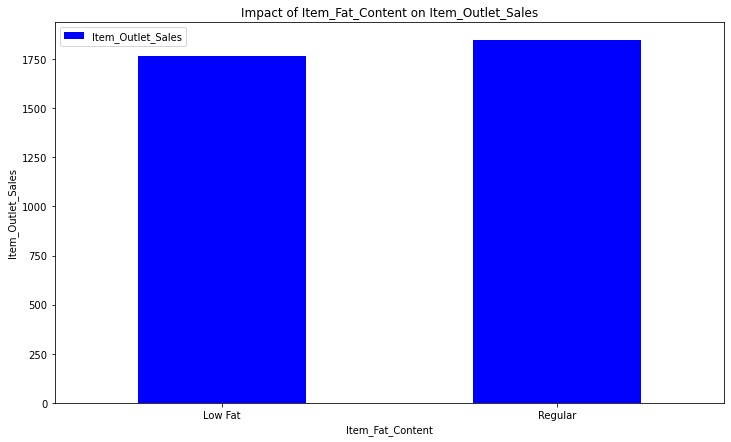

In [437]:
Item_Fat_Content_pivot = Train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

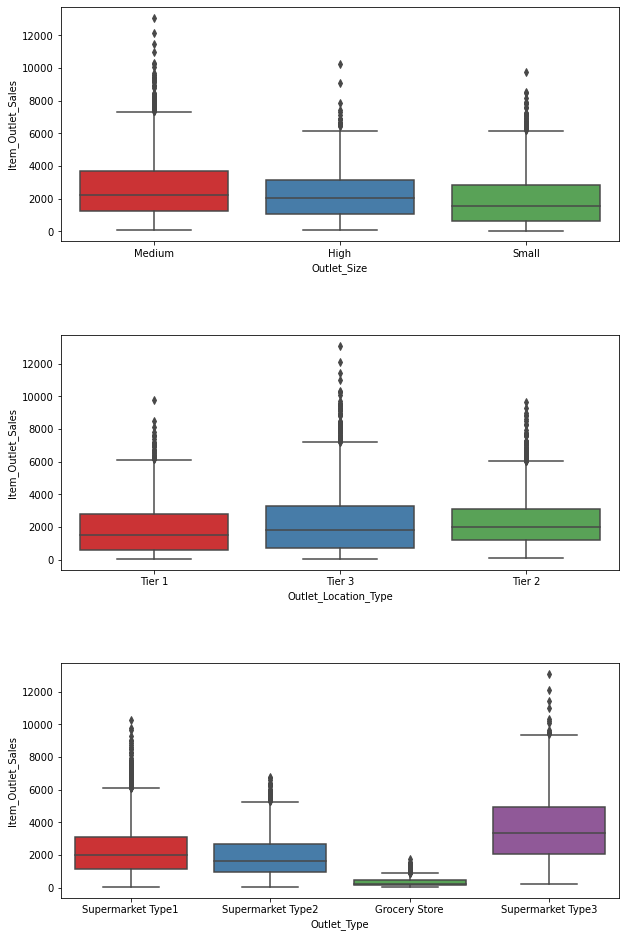

In [438]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=Train, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=Train, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=Train, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

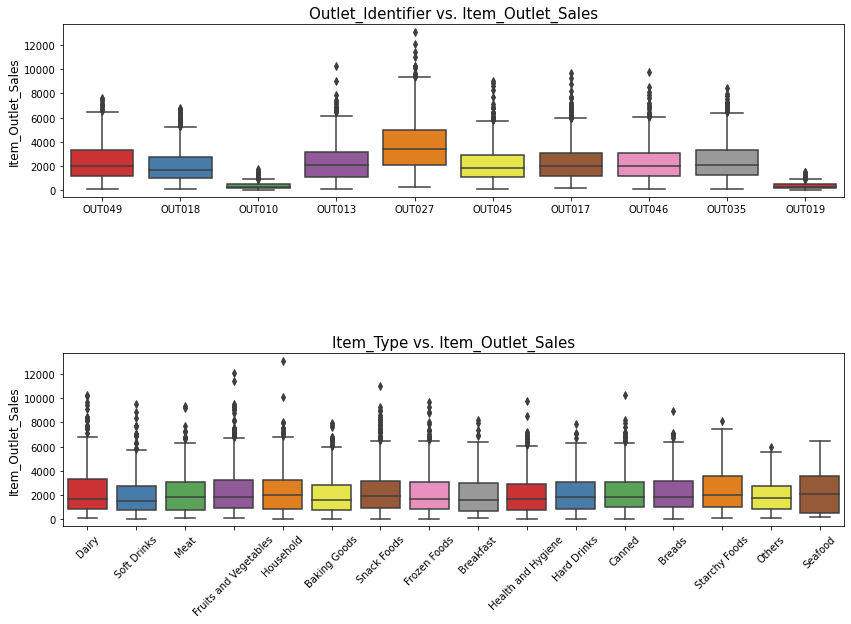

In [439]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=Train, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=Train, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()



# Handle Missing Values - Train

In [440]:
median1 = Train['Item_Weight'].median()
Train['Item_Weight'].replace(np.nan,median1, inplace = True)

In [441]:
mode1 = Train['Outlet_Size'].mode().values[0]
Train['Outlet_Size'].replace(np.nan,mode1, inplace = True)
Train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Handle Missing Values - Test

In [442]:
Test.dropna(inplace = True)

# Modification Train

In [443]:
Mean1 = Train['Item_Visibility'].mean()
Train['Item_Visibility'] = Train['Item_Visibility'].replace(to_replace = 0, value = Mean1)

In [444]:
# Median1 = Train['Item_Visibility'].median()
# Train['Item_Visibility'] = Train['Item_Visibility'].replace(to_replace = 0, value = Median)

In [445]:
#Get the first two characters of ID:
Train['Item_Type_Combined'] = Train['Item_Identifier'].apply(lambda x: x[0:2])
print(Train['Item_Type_Combined'])

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Type_Combined, Length: 8523, dtype: object


In [446]:
#Rename them to more intuitive categories:
Train['Item_Type_Combined'] = Train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
# print(Train['Item_Type_Combined'])
print(Train['Item_Type_Combined'].value_counts())

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64


In [447]:
Train['Outlet_Location_Type_Encoded']  = Train['Outlet_Location_Type'] \
                                            .replace({'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3})

Train[['Outlet_Location_Type', 'Outlet_Location_Type_Encoded']].head()

,Outlet_Location_Type,Outlet_Location_Type_Encoded
0,Tier 1,1
1,Tier 3,3
2,Tier 1,1
3,Tier 3,3
4,Tier 3,3


In [448]:
Train.loc[Train['Item_Type_Combined'] == 
"Non-Consumable", "Item_Fat_Content"] = "Non-Edible"
Train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

# Modification Test

In [449]:
Mean1 = Test['Item_Visibility'].mean()
Test['Item_Visibility'] = Test['Item_Visibility'].replace(to_replace = 0, value = Mean1)

In [450]:
#Get the first two characters of ID:
Test['Item_Type_Combined'] = Test['Item_Identifier'].apply(lambda x: x[0:2])
print(Test['Item_Type_Combined'])

0       FD
5       FD
6       FD
13      FD
14      DR
        ..
5673    FD
5674    DR
5675    FD
5676    FD
5677    FD
Name: Item_Type_Combined, Length: 3099, dtype: object


In [451]:
#Rename them to more intuitive categories:
Test['Item_Type_Combined'] = Test['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
print(Test['Item_Type_Combined'].value_counts())

Food              2222
Non-Consumable     595
Drinks             282
Name: Item_Type_Combined, dtype: int64


In [452]:
Test['Outlet_Location_Type_Encoded']  = Test['Outlet_Location_Type'] \
                                            .replace({'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3})

Test[['Outlet_Location_Type', 'Outlet_Location_Type_Encoded']].head()

,Outlet_Location_Type,Outlet_Location_Type_Encoded
0,Tier 1,1
5,Tier 1,1
6,Tier 3,3
13,Tier 1,1
14,Tier 3,3


In [453]:
Test['Item_Fat_Content'] = Test['Item_Fat_Content'].replace(to_replace = 'low fat', value = 'Low Fat')
Test['Item_Fat_Content'] = Test['Item_Fat_Content'].replace(to_replace = 'LF', value = 'Low Fat')
Test['Item_Fat_Content'] = Test['Item_Fat_Content'].replace(to_replace = 'reg', value = 'Regular')
Test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [454]:
Test.loc[Test['Item_Type_Combined'] == 
"Non-Consumable", "Item_Fat_Content"] = "Non-Edible"
Test['Item_Fat_Content'].value_counts()

Low Fat       1413
Regular       1091
Non-Edible     595
Name: Item_Fat_Content, dtype: int64

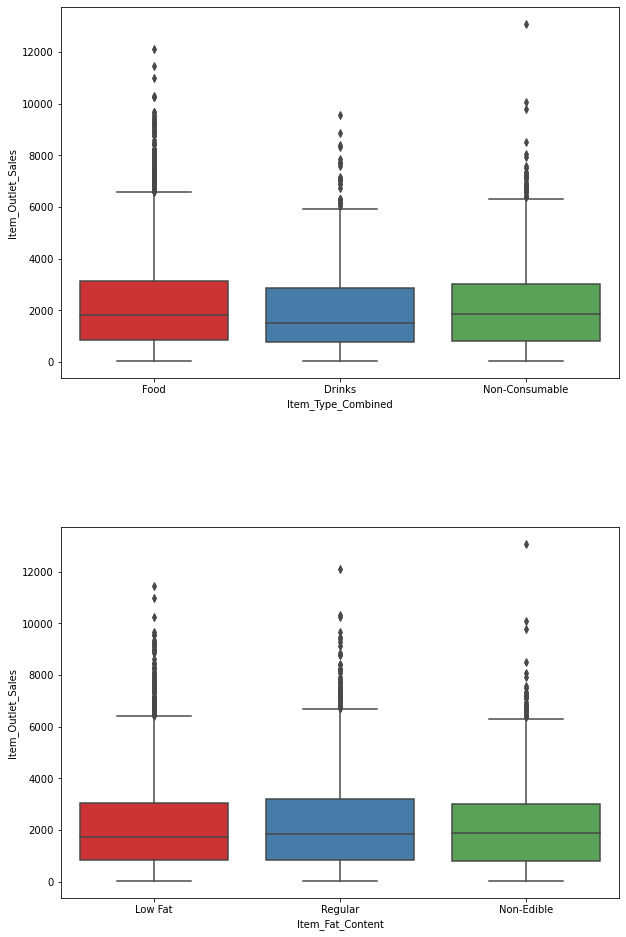

In [455]:
plt.figure(figsize = (10,9))

plt.subplot(211)
sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=Train, palette="Set1")

plt.subplot(212)
x = ['Low Fat', 'Regular']
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=Train, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

In [456]:
#Creates pivot table with Outlet_Type and the mean of 
#Item_Outlet_Sales. Agg function is by default mean()

Train.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


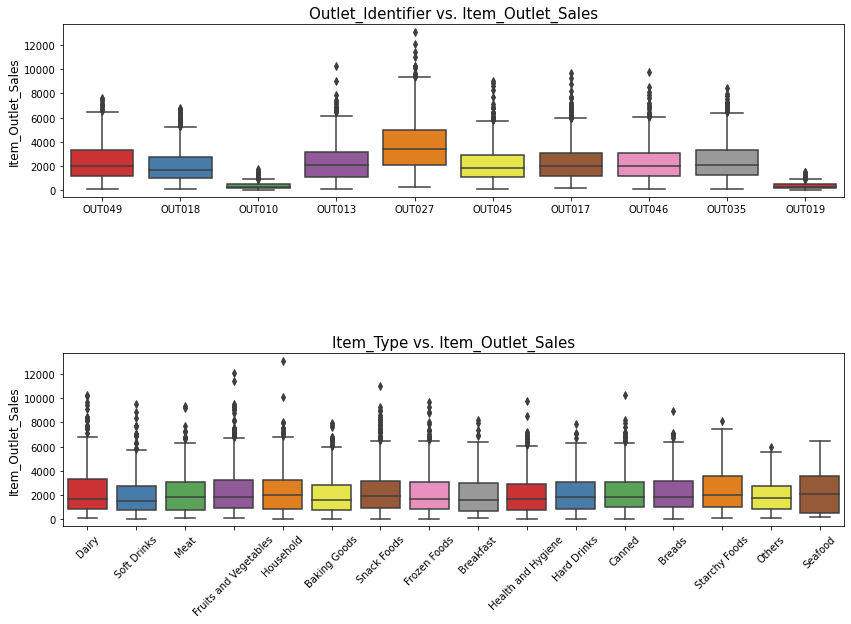

In [457]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=Train, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=Train, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [458]:
Train.index = Train['Outlet_Establishment_Year']
Train.index

Int64Index([1999, 2009, 1999, 1998, 1987, 2009, 1987, 1985, 2002, 2007,
            ...
            2004, 2002, 2009, 2009, 1997, 1987, 2002, 2004, 2009, 1997],
           dtype='int64', name='Outlet_Establishment_Year', length=8523)

In [459]:
df = Train.loc[:,['Item_Outlet_Sales']]
df.head(2)

,Item_Outlet_Sales
Outlet_Establishment_Year,
1999,3735.1380
2009,443.4228


In [460]:
# Train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

In [461]:
#Outlet Age
Train['Outlet_Age'] = 2009 - Train['Outlet_Establishment_Year']
Train['Outlet_Age'].describe()

count    8523.000000
mean       11.168133
std         8.371760
min         0.000000
25%         5.000000
50%        10.000000
75%        22.000000
max        24.000000
Name: Outlet_Age, dtype: float64

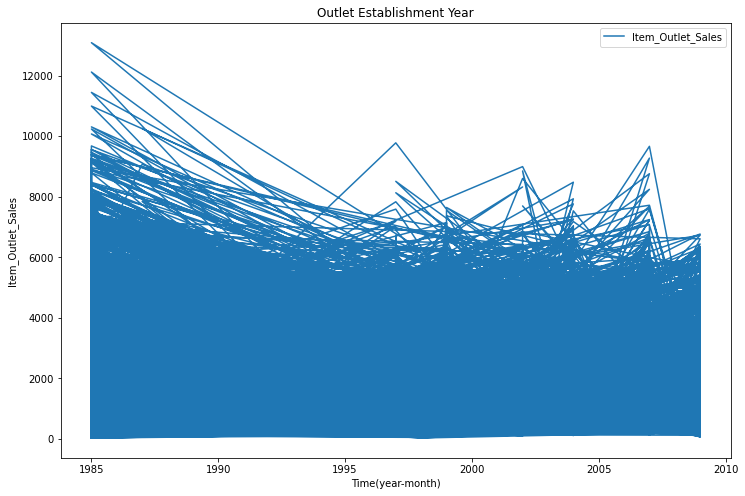

In [462]:
Train.index = Train['Outlet_Establishment_Year']
df = Train.loc[:,['Item_Outlet_Sales']]
ts = df['Item_Outlet_Sales']
plt.figure(figsize=(12,8))
plt.plot(ts, label='Item_Outlet_Sales')
plt.title('Outlet Establishment Year')
plt.xlabel('Time(year-month)')
plt.ylabel('Item_Outlet_Sales')
plt.legend(loc = 'best')
plt.show()

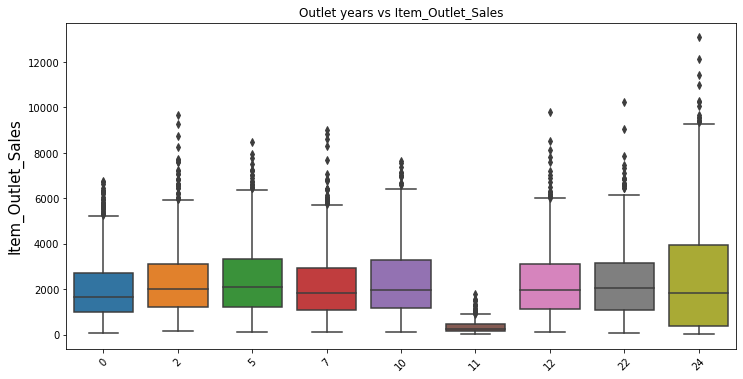

In [463]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = 'Outlet_Age', y = 'Item_Outlet_Sales', data = Train)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_title('Outlet years vs Item_Outlet_Sales')
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15)

plt.show()

In [464]:
# temp_data = Train.loc[Train['Outlet_Establishment_Year'] == 1998]

In [465]:
# temp_data['Outlet_Type'].value_counts()

In [466]:
# Test_temp_data = Test.loc[Test['Outlet_Establishment_Year'] == 1998]
# Test_temp_data['Outlet_Type'].value_counts()

# Encoding

In [467]:
Y = Train.loc[:,"Item_Outlet_Sales"]
X = Train.drop(columns="Item_Outlet_Sales")

In [468]:
X.drop(columns=["Item_Type", 'Outlet_Establishment_Year','Outlet_Identifier','Item_Identifier','Outlet_Location_Type','Outlet_Age'],inplace=True)
print(X.dtypes)

Item_Weight                     float64
Item_Fat_Content                 object
Item_Visibility                 float64
Item_MRP                        float64
Outlet_Size                      object
Outlet_Type                      object
Item_Type_Combined               object
Outlet_Location_Type_Encoded      int64
dtype: object


In [385]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
features = ['Item_Fat_Content','Outlet_Location_Type_Encoded','Outlet_Size','Item_Type_Combined','Outlet_Type']
for i in features:
    X[i] = le.fit_transform(X[i])
    
#One Hot Coding:
X = pd.get_dummies(X, columns=features)

X



,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_Encoded_0,Outlet_Location_Type_Encoded_1,Outlet_Location_Type_Encoded_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
Outlet_Establishment_Year,,,,,,,,,,,,,,,,,,,
1999,9.300,0.016047,249.8092,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2009,5.920,0.019278,48.2692,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
1999,17.500,0.016760,141.6180,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1998,19.200,0.066132,182.0950,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0
1987,8.930,0.066132,53.8614,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,6.865,0.056783,214.5218,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0
2002,8.380,0.046982,108.1570,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
2004,10.600,0.035186,85.1224,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0


In [476]:
Train = Train.drop('Outlet_Establishment_Year', axis = 1)

In [469]:
Test = Test.drop(["Item_Type", 'Outlet_Establishment_Year','Outlet_Identifier','Item_Identifier','Outlet_Location_Type'], axis=1)

In [470]:
Test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Type,Item_Type_Combined,Outlet_Location_Type_Encoded
0,20.750,Low Fat,0.007565,107.8622,Medium,Supermarket Type1,Food,1
5,9.800,Regular,0.063817,117.1492,Small,Supermarket Type1,Food,1
6,19.350,Regular,0.082602,50.1034,Medium,Supermarket Type2,Food,3
13,4.785,Low Fat,0.092738,122.3098,Medium,Supermarket Type1,Food,1
14,16.750,Low Fat,0.021206,52.0298,High,Supermarket Type1,Drinks,3


In [471]:
le = LabelEncoder()
features = ['Item_Fat_Content','Outlet_Location_Type_Encoded','Outlet_Size','Item_Type_Combined','Outlet_Type']
for i in features:
    Test[i] = le.fit_transform(Test[i])
    
#One Hot Coding:
Test = pd.get_dummies(Test, columns=features)

Test



,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_Encoded_0,Outlet_Location_Type_Encoded_1,Outlet_Location_Type_Encoded_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_Type_0,Outlet_Type_1
0,20.750,0.007565,107.8622,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5,9.800,0.063817,117.1492,0,0,1,1,0,0,0,0,1,0,1,0,1,0
6,19.350,0.082602,50.1034,0,0,1,0,0,1,0,1,0,0,1,0,0,1
13,4.785,0.092738,122.3098,1,0,0,1,0,0,0,1,0,0,1,0,1,0
14,16.750,0.021206,52.0298,1,0,0,0,0,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5673,7.070,0.094053,116.0834,1,0,0,0,0,1,0,1,0,0,1,0,0,1
5674,15.700,0.030704,43.2770,1,0,0,1,0,0,0,0,1,1,0,0,1,0
5675,13.000,0.070411,63.4484,0,0,1,1,0,0,0,1,0,0,1,0,1,0
5676,10.500,0.013496,141.3154,0,0,1,1,0,0,0,0,1,0,1,0,1,0


In [ ]:
Test['']

# Linear Regression

In [478]:
# clf = LinearRegression()
# clf.fit(X,Y)
# predictions = clf.predict(Test)

In [481]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 1)

# from sklearn.metrics import accuracy_score

# clf = LinearRegression()

# clf.fit(X_train, Y_train)

# print(clf.score(X_test, Y_test))

# Random Forest

In [482]:
# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
# regressor.fit(X_train, Y_train)
# print(clf.score(X_test, Y_test))